## Laboratorio 3 - Clasificación

## Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 2 - Clasificador de Género

In [1]:
%config IPCompleter.greedy=True
%reset
#Importamos las librerías necesarias
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Scikit-Learn
import sklearn as sk
#Matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Carga y Visualización de Datos

In [2]:
#Importamos el CSV
dataset = pd.read_csv('genero.csv')
#Guardamos una copia del dataset original
datasetOriginal = dataset
#Mostramos los datos
dataset

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [3]:
#Descripción del dataset
dataset.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [4]:
dataset['Favorite Color'].unique()

array(['Cool', 'Neutral', 'Warm'], dtype=object)

In [5]:
dataset['Favorite Music Genre'].unique()

array(['Rock', 'Hip hop', 'Folk/Traditional', 'Jazz/Blues', 'Pop',
       'Electronic', 'R&B and soul'], dtype=object)

In [6]:
dataset['Favorite Beverage'].unique()

array(['Vodka', 'Wine', 'Whiskey', "Doesn't drink", 'Beer', 'Other'],
      dtype=object)

In [7]:
dataset['Favorite Soft Drink'].unique()

array(['7UP/Sprite', 'Coca Cola/Pepsi', 'Fanta', 'Other'], dtype=object)

<b>Vamos a realizar un clasificador mediante árboles de decisión</b>

### Limpieza de campos nulos

In [8]:
nulos = pd.DataFrame(dataset.isna().sum(), columns=["Número de nulos"])
nulos

,Número de nulos
Favorite Color,0
Favorite Music Genre,0
Favorite Beverage,0
Favorite Soft Drink,0
Gender,0


En este dataset no encontramos datos nulos, por lo que podemos continuar sin eliminar nada del dataset.

### 1) Crea un clasificador en el que uses al menos dos criterios de división distintos. Calcula el error de cada uno de ellos y elige el que mejor clasifique (1 punto).

Preparamos los datos para el clasificador normalizando los valores de cada campo

In [9]:
# Creamos un nuevo dataframe para los datos numéricos.
datasetNormalizado = pd.DataFrame()

# Iteramos sobre las columnas del dataframe con los datos categóricos.
for columna in dataset.columns:
    # Introducimos la columna con los datos pasados a numéricos. Esto es necesario pues la librería de sklearn solo
    # trabaja con valores numéricos.
    datasetNormalizado[columna] = pd.factorize(dataset[columna])[0]

# Creamos el array con la clase de cada registro.
prediccion = datasetNormalizado["Gender"].values

# Eliminamos la columna "Gender" que no la necesitamos más en el dataframe, ya que se trata del Target.
del datasetNormalizado["Gender"]

#Extraemos del dataset el nombre de cada característica.
columnas = datasetNormalizado.columns

# Mostramos el nuevo dataframe.
datasetNormalizado.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,0,0,0,0
1,1,1,0,1
2,2,0,1,1
3,2,2,2,2
4,0,0,0,1


In [10]:
prediccion

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(datasetNormalizado, prediccion, stratify=prediccion, test_size=0.2)

### Vamos a realizar un árbol de decision

### Entropía

In [12]:
# Creamos el árbol.
arbolEntropia = DecisionTreeClassifier(criterion='entropy')

# Entrenamos el árbol.
arbolEntropia.fit(x_train, y_train)

print("El acierto del conjunto de entrenamiento es del " 
      + "\033[1m" + str(round(arbolEntropia.score(x_train, y_train) * 100, 1)) + "%" + "\033[0m".format())

print("El acierto del conjunto de validación es del " 
      + "\033[1m" + str(round(arbolEntropia.score(x_test, y_test) * 100, 1)) + "%" + "\033[0m")

El acierto del conjunto de entrenamiento es del 94.2%
El acierto del conjunto de validación es del 50.0%


### Árbol de decisión - Entropía

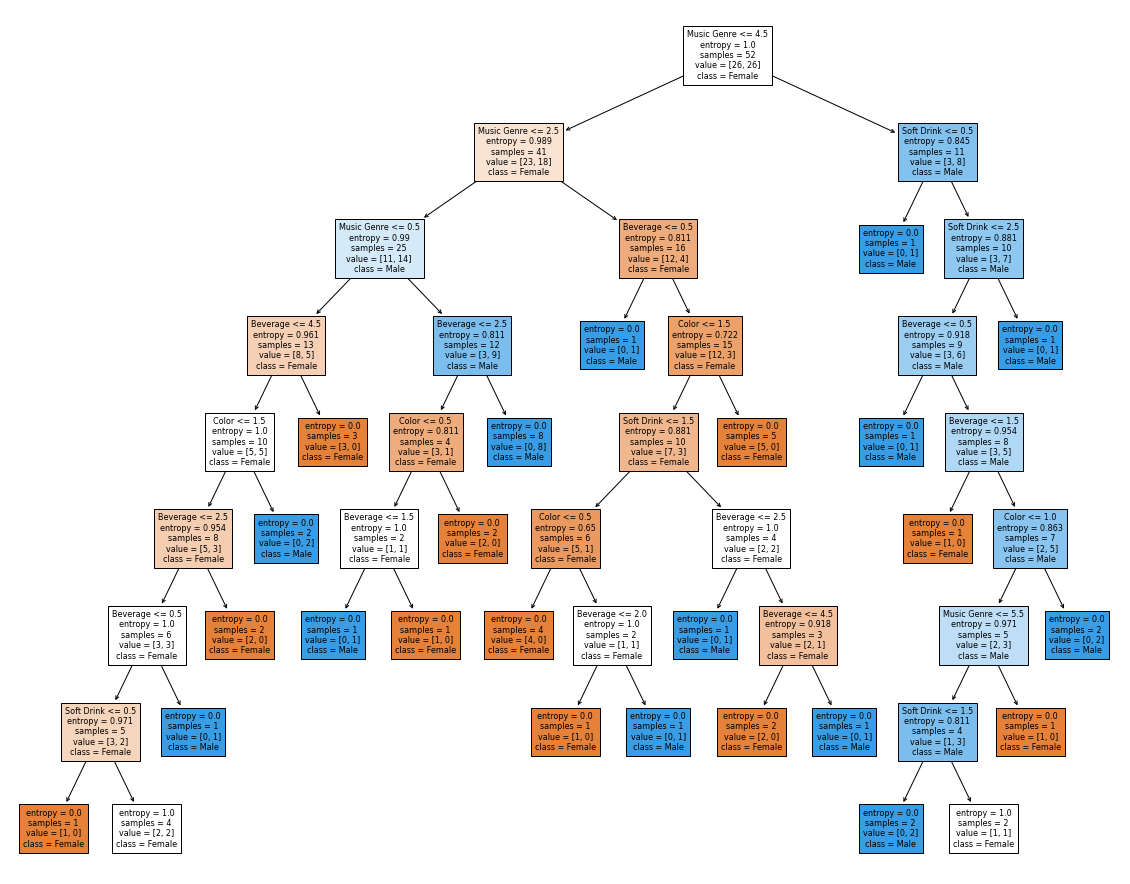

In [13]:
fig, ax = plt.subplots(figsize=(20,16))
tree.plot_tree(arbolEntropia, feature_names = ['Color','Music Genre','Beverage','Soft Drink'], 
               class_names=['Female','Male'], filled=True, fontsize=8)
plt.savefig('arbolEntropia.png')
plt.show()

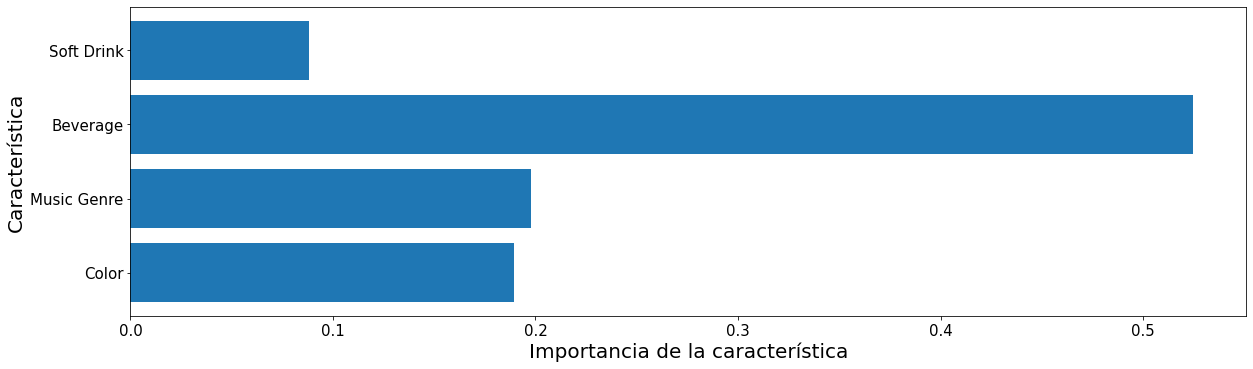

In [14]:
feature_names = ['Color','Music Genre','Beverage','Soft Drink']
num_caracteristicas = columnas.shape[0]
plt.subplots(figsize=(20, 10))
plt.barh(range(num_caracteristicas), arbolEntropia.feature_importances_, align='center')
plt.yticks(np.arange(num_caracteristicas), feature_names)
plt.xlabel('Importancia de la característica',fontsize=20)
plt.ylabel('Característica',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.subplots_adjust(bottom=0.45)
plt.show()

<strong>Ranking de la importancia de los atributos en la Entropía</strong>

In [15]:
importancia = {'Feature Names': feature_names, 'Importancia': arbolEntropia.feature_importances_}
dataframeImportancia = pd.DataFrame(importancia)
dataframeImportancia
ranking = dataframeImportancia.sort_values(by=['Importancia'], ascending = False)
ranking = ranking.reset_index(drop = True)
index = 1
for i in ranking["Feature Names"]:
    print(index, i)
    index += 1

1 Beverage
2 Music Genre
3 Color
4 Soft Drink


### Gini

In [16]:
# Creamos el árbol.
arbolGini = DecisionTreeClassifier(criterion='gini')

# Entrenamos el árbol.
arbolGini.fit(x_train, y_train)

print("El acierto del conjunto de entrenamiento es del " 
      + "\033[1m" + str(round(arbolGini.score(x_train, y_train) * 100, 1)) + "%" + "\033[0m".format())

print("El acierto del conjunto de validación es del " 
      + "\033[1m" + str(round(arbolGini.score(x_test, y_test) * 100, 1)) + "%" + "\033[0m" )

El acierto del conjunto de entrenamiento es del 94.2%
El acierto del conjunto de validación es del 42.9%


### Árbol de decisión - Gini

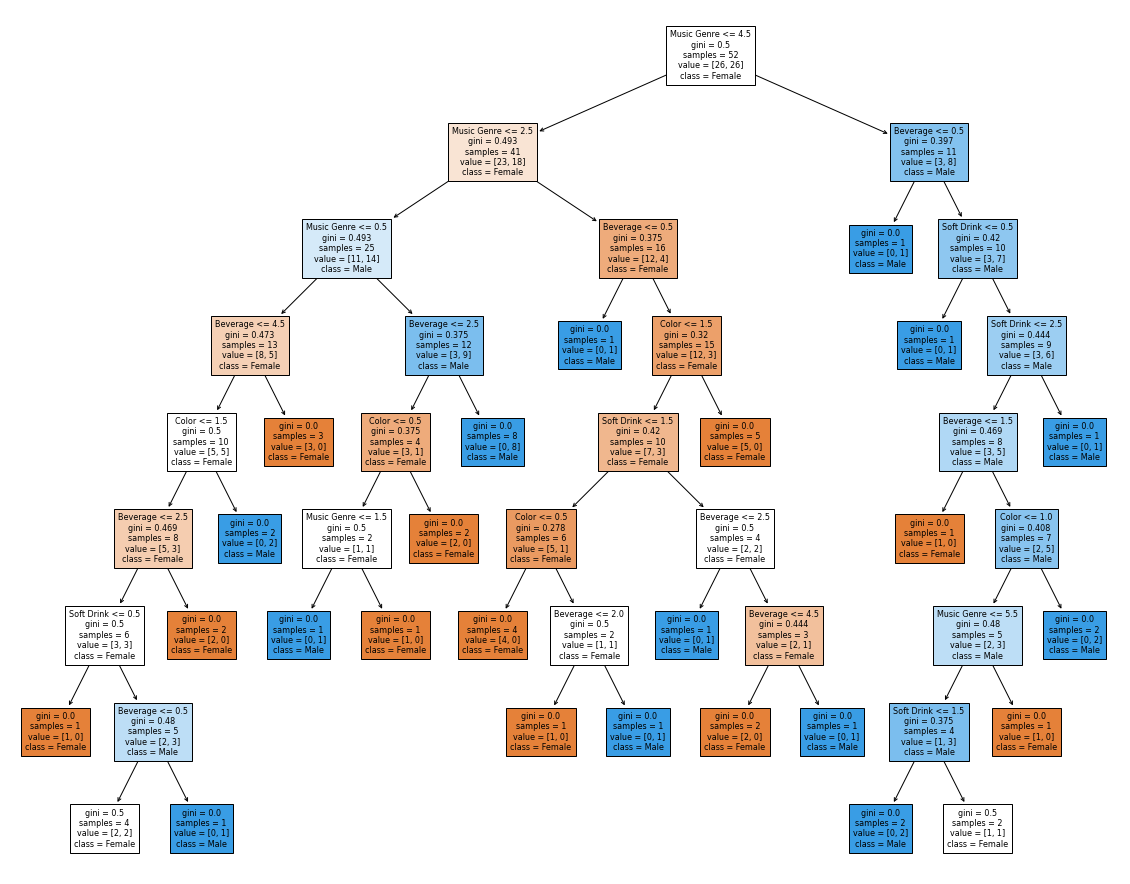

In [17]:
fig, ax = plt.subplots(figsize=(20,16))
tree.plot_tree(arbolGini, feature_names = ['Color','Music Genre','Beverage','Soft Drink'],
 class_names=['Female','Male'], filled=True, fontsize=8)
plt.savefig('arbolGini.png')
plt.show()

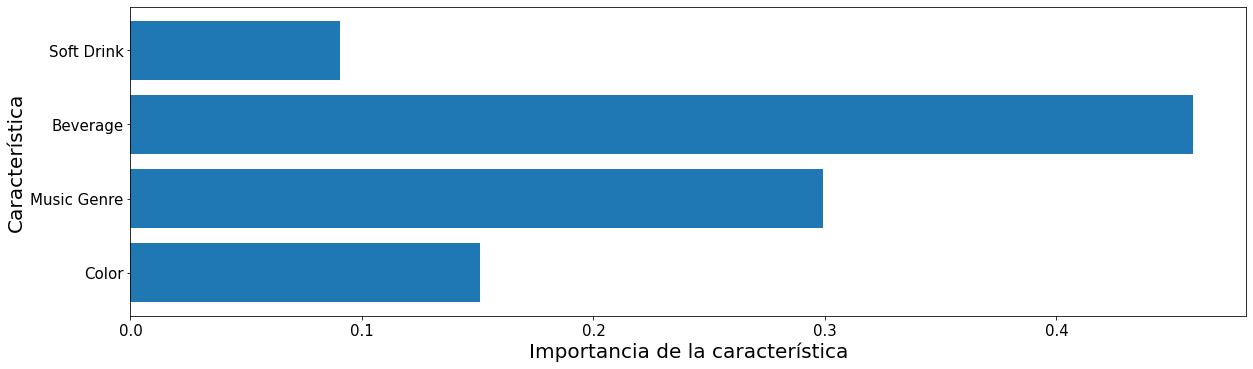

In [18]:
num_caracteristicas = columnas.shape[0]
plt.subplots(figsize=(20, 10))
plt.barh(range(num_caracteristicas), arbolGini.feature_importances_, align='center')
plt.yticks(np.arange(num_caracteristicas), feature_names)
plt.xlabel('Importancia de la característica',fontsize=20)
plt.ylabel('Característica',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.subplots_adjust(bottom=0.45)
plt.show()

<strong>Ranking de la importancia de los atributos en la Entropía</strong>

In [19]:
importanciagini = {'Feature Names': feature_names, 'Importancia': arbolGini.feature_importances_}
dataframeImportanciaGini = pd.DataFrame(importanciagini)
dataframeImportanciaGini
rankingGini = dataframeImportanciaGini.sort_values(by=['Importancia'], ascending = False)
rankingGini = rankingGini.reset_index(drop = True)
index = 1
for i in rankingGini["Feature Names"]:
    print(index, i)
    index += 1

1 Beverage
2 Music Genre
3 Color
4 Soft Drink


### 2) Dibuja el modelo elegido en el punto anterior (0.5 puntos).

In [20]:
modelo = pd.DataFrame()

modelo["Favorite Music Genre"] = datasetOriginal["Favorite Music Genre"]
modelo["Favorite Beverage"] = datasetOriginal["Favorite Beverage"]
modelo["Favorite Color"] = datasetOriginal["Favorite Color"]
modelo["Favorite Soft Drink"] = datasetOriginal["Favorite Soft Drink"]
modelo["Gender"] = datasetOriginal["Gender"]    

# Iteramos sobre las columnas del dataframe con los datos categóricos.
for columna in modelo.columns:
    # Introducimos la columna con los datos pasados a numéricos. Esto es necesario pues la librería de sklearn solo
    # trabaja con valores numéricos.
    modelo[columna] = pd.factorize(dataset[columna])[0]

# Creamos el array con la clase de cada registro.
prediccion = modelo["Gender"].values

# Eliminamos la columna no la volvemos a necesitar
del modelo["Gender"]

#Extraemos del dataset el nombre de cada característica.
columnas = modelo.columns

x_trainM, x_testM, y_trainM, y_testM = train_test_split(modelo, prediccion, stratify=prediccion, test_size=0.2)

modelo.head()

,Favorite Music Genre,Favorite Beverage,Favorite Color,Favorite Soft Drink
0,0,0,0,0
1,1,0,1,1
2,0,1,2,1
3,2,2,2,2
4,0,0,0,1


In [21]:
prediccion

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Árbol de decisión - Entropía

El acierto del conjunto de entrenamiento es del 98.1%
El acierto del conjunto de validación es del 50.0%


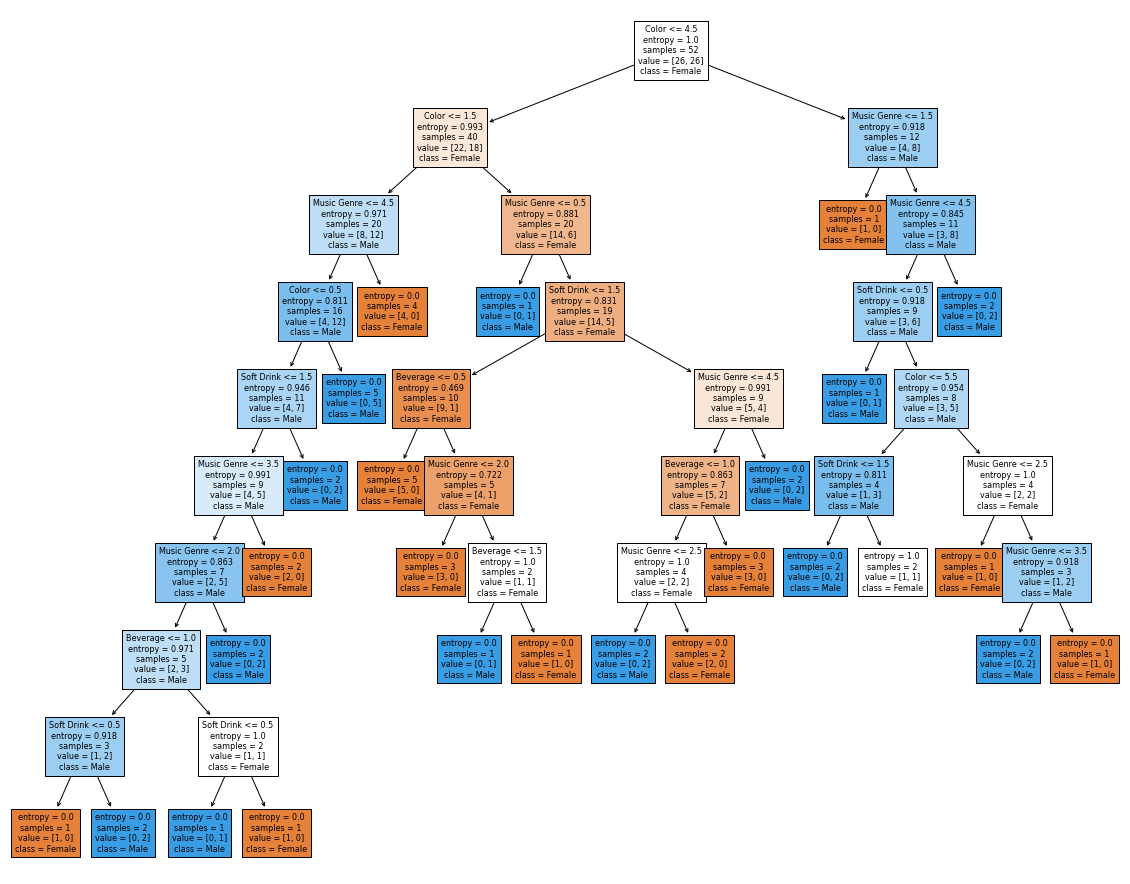

In [22]:
# Creamos el árbol.
arbolModelo = DecisionTreeClassifier(criterion='entropy')

# Entrenamos el árbol.
arbolModelo.fit(x_trainM, y_trainM)

print("El acierto del conjunto de entrenamiento es del " 
      + "\033[1m" + str(round(arbolModelo.score(x_trainM, y_trainM) * 100, 1)) + "%" + "\033[0m".format())

print("El acierto del conjunto de validación es del " 
      + "\033[1m" + str(round(arbolModelo.score(x_testM, y_testM) * 100, 1)) + "%" + "\033[0m" )

fig, ax = plt.subplots(figsize=(20,16))
tree.plot_tree(arbolModelo, feature_names = ['Color','Music Genre','Beverage','Soft Drink'],
               class_names=['Female','Male'], filled=True, fontsize=8)
plt.savefig('arbolModelo.png')
plt.show()

El criterio por el cual hemos seleccionado este árbol utilizando la entropía fue que tras el análisis de ambos métodos, nos dimos cuenta que los porcentajes de precisión que arrojaban los árboles de decisión realizados con entropía, eran mayores.

### 3) Selecciona tres reglas que sean las que generalicen lo menos posible y otras tres que especialicen lo menos posible. Interprétalas. (0,5 puntos).

In [23]:
from sklearn.tree import export_text
r = export_text(arbolModelo, feature_names=['Color','Music Genre','Beverage','Soft Drink'])
print(r)

|--- Color <= 4.50
|   |--- Color <= 1.50
|   |   |--- Music Genre <= 4.50
|   |   |   |--- Color <= 0.50
|   |   |   |   |--- Soft Drink <= 1.50
|   |   |   |   |   |--- Music Genre <= 3.50
|   |   |   |   |   |   |--- Music Genre <= 2.00
|   |   |   |   |   |   |   |--- Beverage <= 1.00
|   |   |   |   |   |   |   |   |--- Soft Drink <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Soft Drink >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Beverage >  1.00
|   |   |   |   |   |   |   |   |--- Soft Drink <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Soft Drink >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Music Genre >  2.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Music Genre >  3.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Soft Drink >  1.50
|   |   |   |   |   |-

### Interpretación de Reglas

<strong>Debido a que cada vez que ejecutamos el entegable, el árbol modelo cambia, dejamos estudiadas unas reglas de uno de los ejemplos que hemos analizado</strong>

Las reglas que menos generalizan son las que se encuentran en la parte superior del árbol de decisión.
En nuestro modelo podríamos encontrar las siguientes:
<br>
<br>

<span>&#8226;</span> R1 General: <strong>Si Music Genre > 4,5 entonces, Female</strong>
<br>
<span>&#8226;</span> R2 General: <strong>Si Favorite Color &lt;= 1,5 entonces, Male</strong>
<br>
<span>&#8226;</span> R3 General: <strong>Si Favorite Color &gt; 1,5 y &lt;= 4.5 entonces, Female</strong>
<br>
<br>

En cuanto a las reglas específicas, son al contrario que las generales, las que se encuentran en la parte más baja del árbol. Para obtener las 3 reglas más específicas hemos ido a los nodos finales del árbol y hemos obtenido las siguientes reglas:
<br>
<br>

<span>&#8226;</span> R1 Específica: <strong>Si Favorite Beverage &lt;= 1.0 y Favorite Music Genre &lt;= 0.5 y Favorite Color &lt;= 0.5 entonces, Female</strong>
<br>
<span>&#8226;</span> R2 Específica: <strong>Si Favorite Beverage &lt;= 1.0 y Favorite Music Genre &lt;= 3.5 entonces, Male</strong>
<br>
<span>&#8226;</span> R3 Específica: <strong>Si Soft Drink &lt;= 1.5 y Favorite Beverage &lt;= 0.5 y Favorite Color &gt; 1,5 y &lt;= 4.5 entonces, Female</strong>

### 4) Usa tu clasificador para decidir qué género corresponde a las preferencias de cada uno de los miembros del equipo de prácticas (al menos estudiad 4 preferencias) (1 punto)

In [24]:
d = {'Favorite Color': ['Cool','Neutral','Neutral','Warm'], 'Favorite Music Genre': ['Pop','Pop','Electronic','Rock'],
     'Favorite Beverage': ['Beer','Other','Wine','Whiskey'], 'Favorite Soft Drink': ['Coca Cola/Pepsi','Other','Coca Cola/Pepsi','Other'], 
     'Gender': ['M','F','F','M']}

preferenciasGrupo = pd.DataFrame(d)

preferenciasGrupo

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Pop,Beer,Coca Cola/Pepsi,M
1,Neutral,Pop,Other,Other,F
2,Neutral,Electronic,Wine,Coca Cola/Pepsi,F
3,Warm,Rock,Whiskey,Other,M


Este dataset es el dataset de test para nuestro modelo. Nos permitirá clasificar a los individuos

In [25]:
#Normalizamos los datos
# Iteramos sobre las columnas del dataframe con los datos categóricos.
for columna in preferenciasGrupo.columns:
    # Introducimos la columna con los datos pasados a numéricos. Esto es necesario pues la librería de sklearn solo
    # trabaja con valores numéricos.
    preferenciasGrupo[columna] = pd.factorize(preferenciasGrupo[columna])[0]

In [26]:
#Separamos la clase de los datos
clasePreferencias = preferenciasGrupo['Gender']
clasePreferencias

0    0
1    1
2    1
3    0
Name: Gender, dtype: int64

In [27]:
datosPreferencias = preferenciasGrupo.drop(columns='Gender')
datosPreferencias

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,0,0,0,0
1,1,0,1,1
2,1,1,2,0
3,2,2,3,1


In [28]:
#Comprobando fiabilidad del modelo
prediccion = arbolModelo.predict(datosPreferencias)
aciertos = 0;
errores = 0;
totales = len(prediccion)
i = 0
for valorPredicho in prediccion:            
    print('Se ha predecido que el género es:\033[1m', valorPredicho, '\033[0m Deberia ser:\033[1m', clasePreferencias.iloc[i], '\033[0m')
    if valorPredicho == clasePreferencias.iloc[i]:
        print('\033[92mACIERTO!\033[0m')
        aciertos = aciertos+1
    else:
        print('\033[91mERROR\033[0m')
        errores = errores+1
    i = i+1

Se ha predecido que el género es: 0  Deberia ser: 0 
ACIERTO!
Se ha predecido que el género es: 1  Deberia ser: 1 
ACIERTO!
Se ha predecido que el género es: 1  Deberia ser: 1 
ACIERTO!
Se ha predecido que el género es: 0  Deberia ser: 0 
ACIERTO!


## Conclusión

La decisión de utilizar la entropía en nuestro árbol modelo, es debido a que tras ejecutar varias veces el script, los resultados siempre eran notablemente mejores para el árbol de decisión con criterio de entropía. Además, la entropía trata la ganancia de información mientras que el Gini mide la impureza. Para este caso concreto, nos interesa más la entropía porque nos interesa ver la ganancia de información en las diferentes hojas del árbol.
<br>
<br>
Tras el análisis del dataset, nos damos cuenta que hacen falta más atributos para que nuestra predicción tuviera menos error. Entre los pocos registros y su variedad, nos lleva a una precisión muy baja. Además, utilizando nuestra clasificación, anteriormente calculada, en un ejemplo nuestro nos falla en 2 de 3 personas reales. 